# Project Title - Used Car Data Analysis

CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission
* Owner
* torque
* seats
* mileage
* max_power
* engine

## Downloading the Dataset

We can download the dataset from Kaggle using the opendatasets library by importing it.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./vehicle-dataset-from-cardekho" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './vehicle-dataset-from-cardekho'

In [5]:
import os
os.listdir(data_dir)

['CAR DETAILS FROM CAR DEKHO.csv', 'car data.csv', 'Car details v3.csv']

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

The first step to analyse any dataset is to clean and prepare the data. Some of the steps involved are

* Handling missing values.
* Format existing data to make it meaningful for plotting.
* Try to create new columns using existing columns.

In [10]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [11]:
car_details_df = pd.read_csv('./vehicle-dataset-from-cardekho/Car details v3.csv') # reading the data
car_details_df.head() # first 5 rows 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
print('The dataset has {} rows and {} columns'.format(car_details_df.shape[0], car_details_df.shape[1]))

The dataset has 8128 rows and 13 columns


In [13]:
# missing values in the dataset

car_details_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

### Mileage:

Mileage indicates the distance that a vehicle can travel with a specific amount of fuel

If we look at the Mileage Columns, we see that the column contains 2 units -  `km/kg` and  `kmpl`

In [14]:
car_details_df['mileage'].unique()[:10]

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl'], dtype=object)

In [15]:
kmpl = 0
kmkg = 0

for i in car_details_df['mileage']:
    if str(i).endswith('kmpl'):
        kmpl += 1
    elif str(i).endswith('km/kg'):
        kmkg += 1
        
print('Number of data represented as kmpl :',kmpl)
print('Number of data represented as km/kg :',kmkg)

Number of data represented as kmpl : 7819
Number of data represented as km/kg : 88


Here we can just extract the numerical values using the split method. And also we can use the endswith method to find the unit in which the data is specified.

In [16]:
correct_mileage = []

for i in car_details_df['mileage']:
    if(str(i).endswith('km/kg')):
        i = float(i.split()[0]) # getting the numerical part from string
        i = i * 1.40
        correct_mileage.append(i)
    elif(str(i).endswith('kmpl')):
        i = float(i.split()[0]) # getting the numerical part from string
        correct_mileage.append(i)
    else:
        correct_mileage.append(0) # 0 because its a nan value
        

In [17]:
car_details_df['mileage'] = correct_mileage # updating in the dataframe

In [18]:
median = np.median(car_details_df['mileage']) # getting the median value of mileage column

car_details_df['mileage'].replace(0, median, inplace = True) # replacing 0 with median value 

### Engine:

Let's take a look at the `Engine` column

In [19]:
car_details_df['engine'].unique()[:30]

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC'],
      dtype=object)

Here we can just extract the numerical values using the split method.

In [20]:
engine = []

for val in car_details_df['engine']:
    if str(val) != 'nan':
        val = val.split()[0]  # getting the numerical part from string
        engine.append(int(val))
    else:
        engine.append(0) 

In [21]:
car_details_df['engine'] = engine # updating in the dataframe

median = np.median(car_details_df['engine']) # getting the median value of column

car_details_df['engine'].replace(0, median, inplace = True) # replacing 0 with median value 

### Max Power:

Let's take a look at the `Max Power` column

In [22]:
# here we have a incorrect value which also must be replaced

car_details_df[car_details_df['max_power'] == ' bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,15.26,796,bhp,NaN,8.0


Here we can just extract the numerical values using the split method.

In [23]:
max_power = []

for val in car_details_df['max_power']:
    if str(val) != 'nan' and str(val) != ' bhp':
        val = val.split()[0] # getting the numerical part from string
        max_power.append(float(val))
    else:
        max_power.append(0) # 0 because its a nan value or incorrect value

In [24]:
car_details_df['max_power'] = max_power # updating in the dataframe

median = np.median(car_details_df['max_power']) # getting the median value of column

car_details_df['max_power'].replace(0, median, inplace = True) # replacing 0 with median value 

### Torque

Let's take a look at the `Torque` column

In [25]:
car_details_df['torque'].unique()[:10]

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm'], dtype=object)

In [26]:
# replacing the nan values with a new value 'Unknown' 
# because the value cannot be derived mathematically

car_details_df['torque'].fillna('Unknown', inplace = True) 

### Seats:

Let's take a look at the `Seats` column

In [27]:
car_details_df['seats'].unique()[:10]

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [28]:
# filling the nan values with 4 
# because as four wheeler it can act as a standard value

car_details_df['seats'].fillna(4, inplace = True)

In [29]:
car_details_df.info() # checking the data type of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   int64  
 10  max_power      8128 non-null   float64
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 825.6+ KB


In [30]:
# changing float datatype to integer type

car_details_df['seats'] = car_details_df['seats'].astype(int) 

In [31]:
car_details_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5


### Brand Name:

We can create a new column `Brand Name` by using the `name` column.

In [32]:
car_details_df['name'][:15]

0                   Maruti Swift Dzire VDI
1             Skoda Rapid 1.5 TDI Ambition
2                 Honda City 2017-2020 EXi
3                Hyundai i20 Sportz Diesel
4                   Maruti Swift VXI BSIII
5            Hyundai Xcent 1.2 VTVT E Plus
6             Maruti Wagon R LXI DUO BSIII
7                       Maruti 800 DX BSII
8                         Toyota Etios VXD
9     Ford Figo Diesel Celebration Edition
10         Renault Duster 110PS Diesel RxL
11                           Maruti Zen LX
12                  Maruti Swift Dzire VDi
13                    Maruti Swift 1.3 VXi
14                Maruti Wagon R LXI Minor
Name: name, dtype: object

We can see that on all the data present the first word is the brand name.

In [33]:
# We can extract the brand name

car_details_df['brand_name'] = car_details_df['name'].apply(lambda x:x.split()[0])

In [34]:
car_details_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Maruti


## Exploratory Analysis and Visualization

We do EDA to find the hidden trends and pattern that are present in the dataset by plotting graphs using matplotlib and seaborn library.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [38]:
car_details_df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.546849,1452.89813,91.321690,5.378199
std,4.044249,8.062534e+05,5.655055e+04,4.090366,498.19672,35.291231,0.974096
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,624.00000,32.800000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.160000,1248.00000,81.860000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.00000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.00000,400.000000,14.000000


In [39]:
car_details_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Maruti


### Heatmap :

Heatmaps are used to find the correlation between the columns present in the dataset.

<AxesSubplot:>

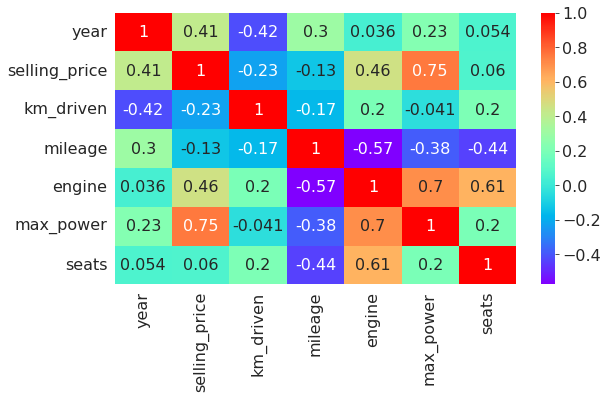

In [40]:
correlation = car_details_df.corr()

sns.heatmap(correlation, annot = True, cmap = 'rainbow')

* Here we can see that selling price and max power have the highest correlation of 0.75 . 

* Year and selling price are also having considerable correlation value of 0.41 .

### Selling Price

Since it is a numerical column we can use a histogram to check the distribution of the values present in it.

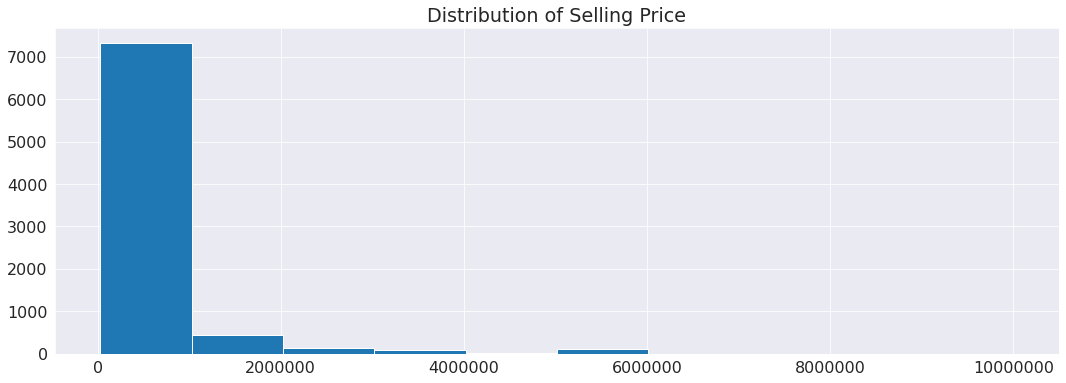

In [41]:
plt.figure(figsize = (18,6))

plt.title('Distribution of Selling Price')
plt.hist(car_details_df['selling_price'])
plt.ticklabel_format(style = 'plain', axis ='x')
plt.show();

We can see that 90% of the cars have a selling price in the range of 0 to 1000000

### Kilometers driven

Since it is a numerical column we can use a histogram to check the distribution of the values present in it.

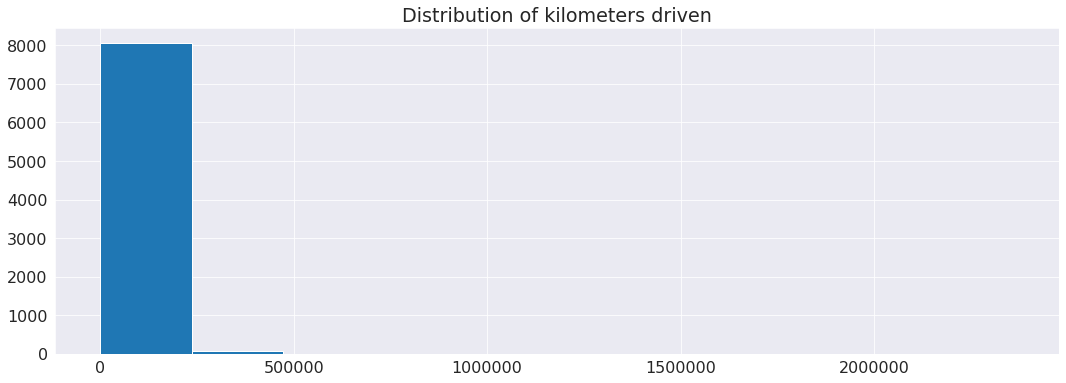

In [42]:
plt.figure(figsize = (18,6))

plt.title('Distribution of kilometers driven')
plt.hist(car_details_df['km_driven'])
plt.ticklabel_format(style = 'plain', axis ='x')
plt.show();

We can see that about 95% of the cars that are sold has driven about 2,50,000 kms.

### Km_driven and selling_price

We can use a scatter plot to see if there a any relationship between the the two numeric columns.

Since the values present in both the columns are quite large we can plot their respective log values in the scatter plot.

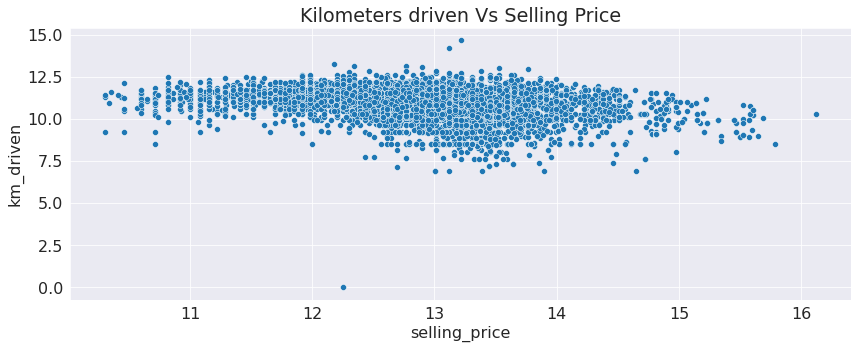

In [43]:
plt.figure(figsize = (14,5))

sns.scatterplot(y = np.log(car_details_df['km_driven']), 
                x = np.log(car_details_df['selling_price']))

plt.title('Kilometers driven Vs Selling Price')

plt.show()

* Here we can see that the frequency of values are higher for values 12 to 14 in the selling price ans 9 to 13 in kilometers driven.

### Maximum Power and Selling Price:

Since they both are numerical columns we can use a scatter plot to see the relationship between both these columns.

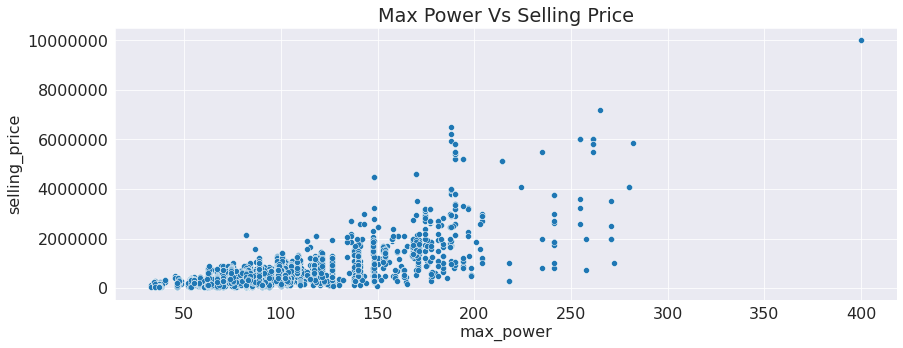

In [44]:
plt.figure(figsize = (14,5))

sns.scatterplot(x = (car_details_df['max_power']), 
                y = (car_details_df['selling_price']))

plt.title('Max Power Vs Selling Price')
plt.ticklabel_format(style = 'plain', axis ='y')
plt.show()

* Here we can see that there is a slight linear relationship between the two columns.

### Year and Selling Price

We can find the selling price of various cars depending upon the year they were sold by grouping them.

We can use a line plot to find the variation of price over the year.

In [45]:
year_wise_sell_price = car_details_df.groupby('year')['selling_price'].agg(np.median).reset_index()
year_wise_sell_price.head()

,year,selling_price
0,1983,300000.0
1,1991,55000.0
2,1994,99000.0
3,1995,107500.0
4,1996,42000.0


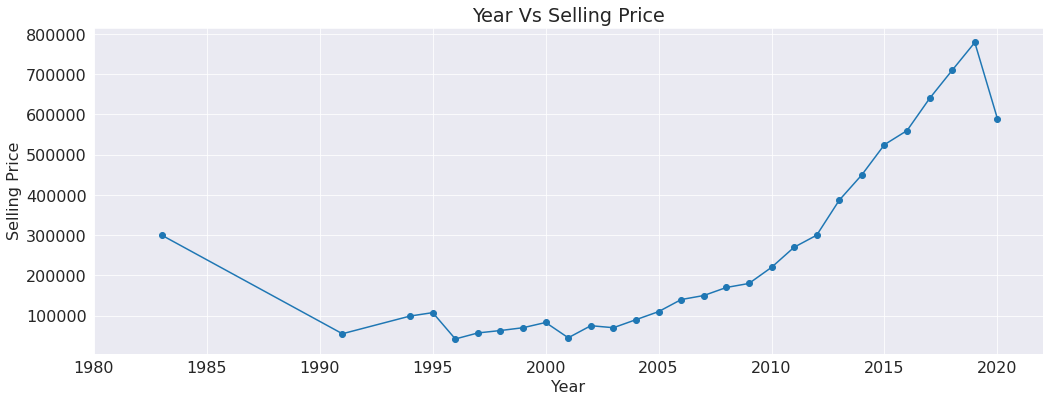

In [46]:
plt.figure(figsize = (17,6))

plt.plot(year_wise_sell_price['year'], year_wise_sell_price['selling_price'], marker = 'o')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Selling Price', fontsize = 16)
plt.xlim(1980, 2022)
plt.title('Year Vs Selling Price')
plt.show();

* Here we can see that from 2001 there price of the cars increases gradually and reaches its peak at 2019.
* Also from 1980 to 1990 there is linear decrease in the price of the cars.

### Number of Cars:

In [47]:
brand_df = pd.DataFrame(car_details_df.groupby('brand_name')['brand_name'].count())
brand_df.rename(columns = {'brand_name' : 'count'}, inplace = True)
brand_df = brand_df.reset_index().sort_values(by = 'count', ascending = False)
brand_df.head()

,brand_name,count
20,Maruti,2448
11,Hyundai,1415
19,Mahindra,772
28,Tata,734
29,Toyota,488


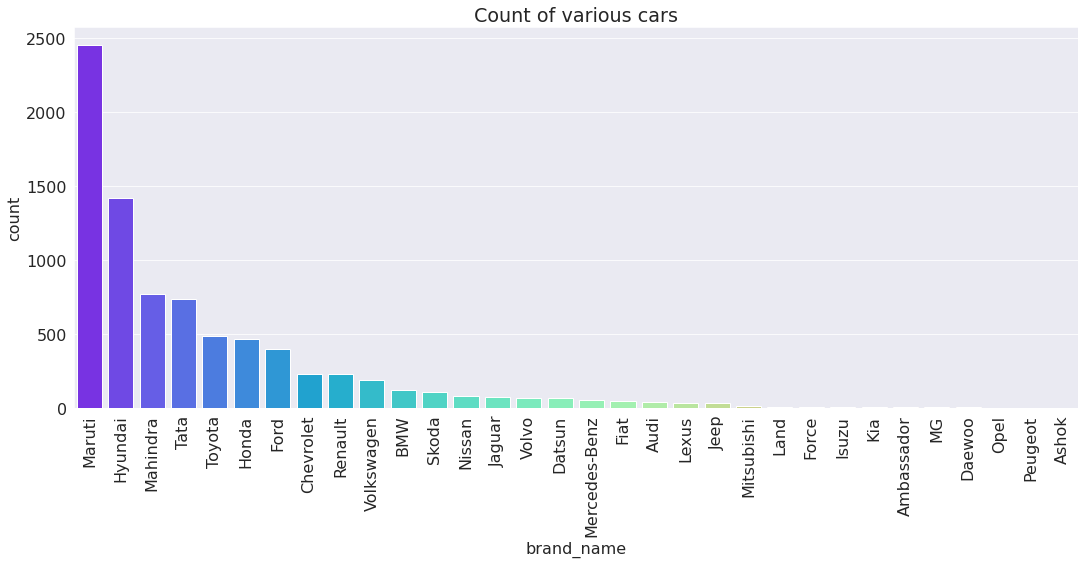

In [48]:
plt.figure(figsize = (18, 7))

sns.barplot(x = 'brand_name', y = 'count', data = brand_df, palette = 'rainbow')
_ = plt.xticks(rotation = 90, fontweight = 'light')
plt.title('Count of various cars')
plt.show()

* Here we can see that cars like Maruti, Hyundai, Mahindra, Tata, Toyota etc are the top 5 cars that are available.

### Brand Name and Selling Price

We can find the average of price of each brand by grouping the two columns.

In [49]:
avg_price_brand = car_details_df.groupby('brand_name')['selling_price'].agg(np.mean).reset_index().sort_values(by = 'selling_price', ascending = False)
avg_price_brand.head()

,brand_name,selling_price
17,Lexus,5.150000e+06
3,BMW,4.109917e+06
16,Land,3.608333e+06
31,Volvo,3.272015e+06
13,Jaguar,2.915465e+06


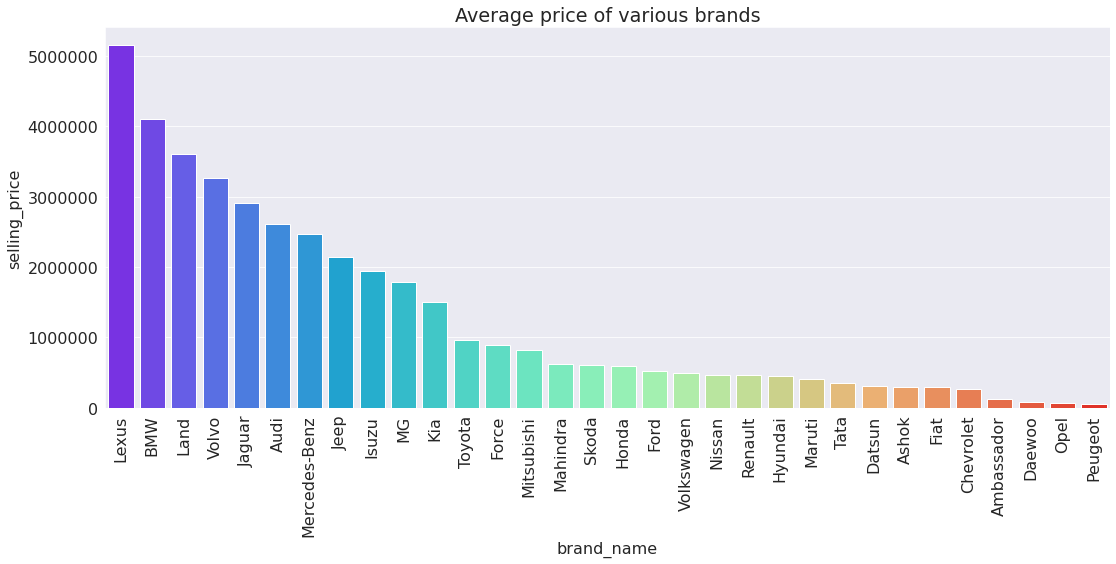

In [50]:
plt.figure(figsize = (18, 7))

sns.barplot(x = 'brand_name', y = 'selling_price', data = avg_price_brand, palette = 'rainbow')
_ = plt.xticks(rotation = 90, fontweight = 'light')
plt.title('Average price of various brands')
plt.ticklabel_format(style = 'plain', axis ='y')
plt.show()

* Here we can see that Lexus, BMW, Volvo, Jaguar etc are some of the costliest used cars.

Let us save and upload our work to Jovian before continuing

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "santhosh-0-3/zerotopandas-course-project-vehicles-dataset" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset


'https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset'

## Asking and Answering Questions

#### Q1: Does the type of seller affect the price of the cars?

Here we have 3 types of seller
 
* Dealer
* Individual
* Trustmark Dealer

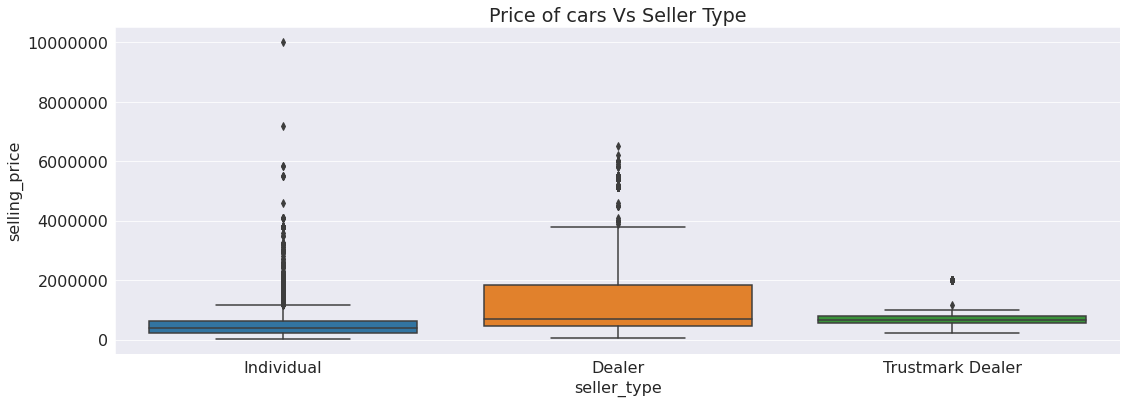

In [53]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'seller_type', y = 'selling_price', data = car_details_df )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Seller Type')
plt.show()

In [54]:
car_details_df.groupby('seller_type')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,1126.0,1.443494e+06,1.569286e+06,60000.0,475000.0,690000.0,1843750.0,6523000.0
Individual,6766.0,4.985612e+05,4.837797e+05,29999.0,240000.0,400000.0,615750.0,10000000.0
Trustmark Dealer,236.0,8.018390e+05,5.080779e+05,225000.0,550000.0,650000.0,779000.0,2000000.0


* Here we can see that most of the cars are sold individually when it comes to selling price,  the amount generated by a dealer is more greater than the amount generated individually.
* But the maximum price is generated by a car that was sold individually.

In [55]:
# the car with maximum price

car_details_df[car_details_df['selling_price'] == car_details_df['selling_price'].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969,400.0,640Nm@ 1740rpm,4,Volvo


#### Q2: Does the number of owners affect the price of cars?

We have five categories in the owner column

* First Owner
* Second Owner
* Third Owner
* Fourth & Above Owner
* Test Drive Car

In [56]:
car_details_df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

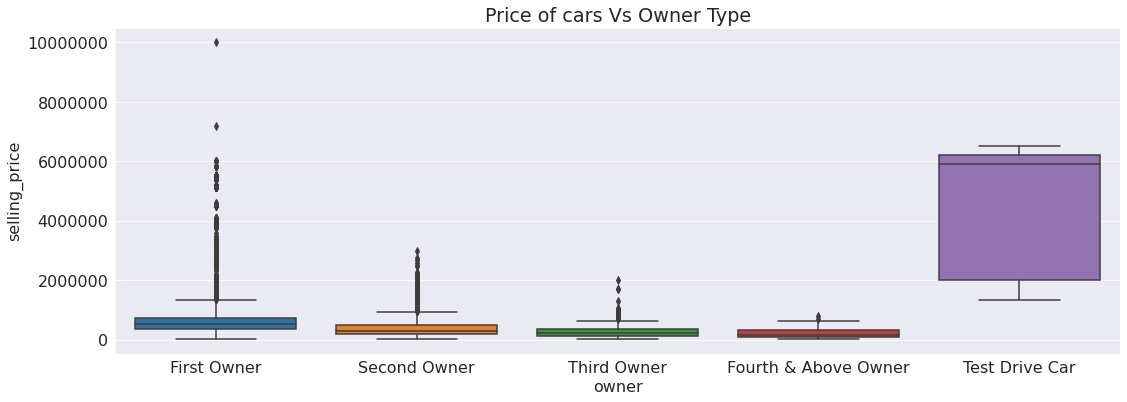

In [57]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'owner', y = 'selling_price', data = car_details_df )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Owner Type')
plt.show()

In [58]:
car_details_df.groupby('owner')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,5289.0,7.830864e+05,9.319794e+05,30000.0,350000.0,550000.0,750000.0,10000000.0
Fourth & Above Owner,174.0,2.258132e+05,1.549900e+05,31000.0,105750.0,170000.0,323750.0,810000.0
Second Owner,2105.0,3.929645e+05,3.264403e+05,33983.0,190000.0,310000.0,500000.0,3000000.0
Test Drive Car,5.0,4.403800e+06,2.510598e+06,1350000.0,2000000.0,5923000.0,6223000.0,6523000.0
Third Owner,555.0,2.840153e+05,2.268865e+05,29999.0,140000.0,225000.0,350000.0,2000000.0


* We can see that as the number of owners for a car increases the selling price decreases eventually.
* People are likely to buy cars that are owned by only one owner.
* Even though the number of Test Drive cars are low they are a having considerable price compared to owned cars.

In [59]:
car_details_df[car_details_df['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498,108.60,250Nm@ 1500-3000rpm,5,Volkswagen
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,320Nm@ 1400-4100rpm,5,Audi
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,320Nm@ 1400-4100rpm,5,Audi
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,320Nm@ 1400-4100rpm,5,Audi
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799,139.46,174Nm@ 4300rpm,5,Honda


#### Q3: Does transmission affect the price of cars?

There are two categories in transmission

* Manual
* Automatic

In [60]:
car_details_df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

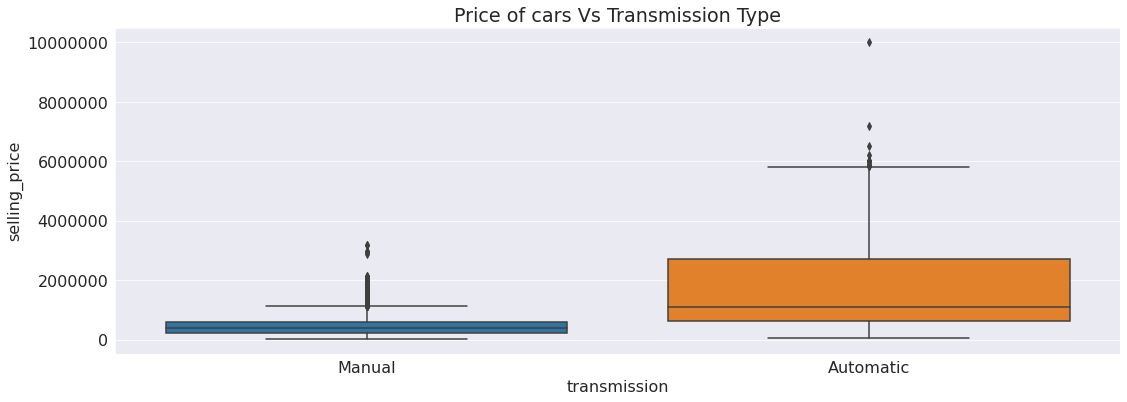

In [61]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'transmission', y = 'selling_price', data = car_details_df )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Transmission Type')
plt.show()

In [62]:
car_details_df.groupby('transmission')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
Automatic,1050.0,1.870828e+06,1.640533e+06,75000.0,645000.0,1100000.0,2711000.0,10000000.0
Manual,7078.0,4.554259e+05,2.978652e+05,29999.0,240000.0,400000.0,600000.0,3200000.0


* Here we can see that the price of automatic cars are quite large compared to cars having manual transmission.
* The higher price might be due to the lower number of automatic cars that are available.

#### Q4:  Does fuel type affect the selling price of cars?

In [63]:
car_details_df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

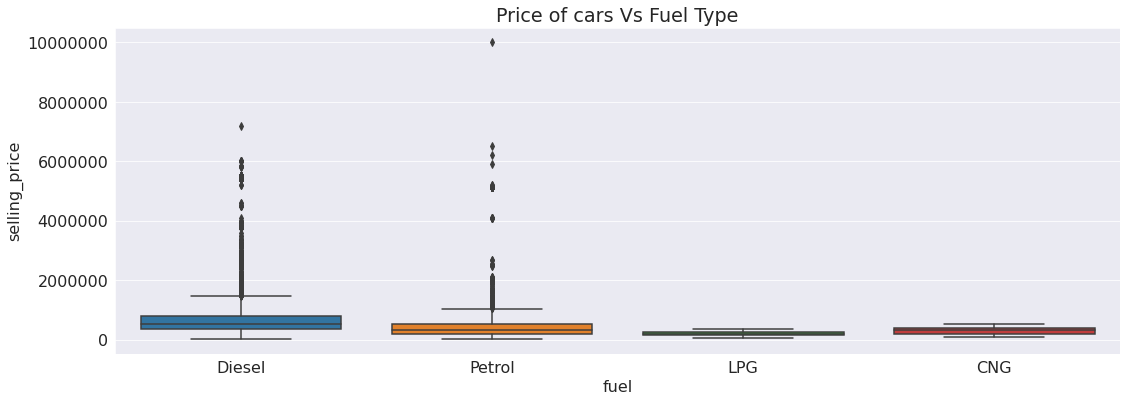

In [64]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'fuel', y = 'selling_price', data = car_details_df )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Fuel Type')
plt.show()

In [65]:
car_details_df.groupby('fuel')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
CNG,57.0,301017.491228,111582.298949,80000.0,200000.0,320000.0,390000.0,545000.0
Diesel,4402.0,791452.921627,908894.768774,40000.0,350000.0,550000.0,800000.0,7200000.0
LPG,38.0,200421.052632,84921.468199,54000.0,148250.0,195500.0,275000.0,375000.0
Petrol,3631.0,462441.061691,624788.835690,29999.0,200000.0,345000.0,550000.0,10000000.0


* We can see that average price of diesel cars are higher compared to other type of fuel type.

#### Q5: Does number of seats affect the price of the car?

In [66]:
car_details_df['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

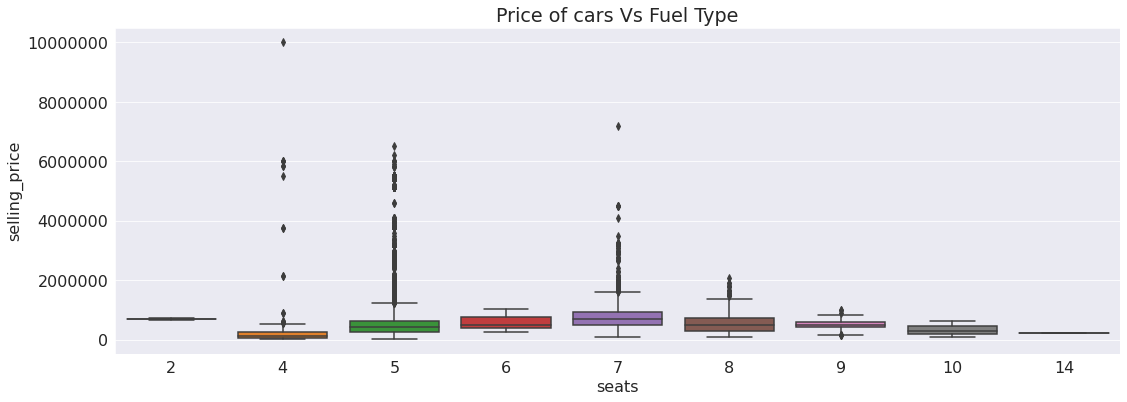

In [67]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'seats', y = 'selling_price', data = car_details_df )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Fuel Type')
plt.show()

In [68]:
car_details_df.groupby('seats')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
seats,,,,,,,,
2,2.0,700500.000000,30405.591591,679000.0,689750.00,700500.0,711250.0,722000.0
4,354.0,325157.276836,956500.661218,29999.0,66500.00,125000.0,250000.0,10000000.0
5,6254.0,630044.551807,842665.952291,30000.0,250000.00,420000.0,649000.0,6523000.0
6,62.0,581596.774194,221535.510211,280000.0,400000.00,500000.0,756250.0,1040000.0
7,1120.0,812923.184821,600813.786316,95000.0,500000.00,687000.0,940000.0,7200000.0
8,236.0,583711.826271,392885.010970,80000.0,300000.00,500000.0,750000.0,2064000.0
9,80.0,500074.937500,176568.696093,150000.0,421249.75,500000.0,600000.0,999000.0
10,19.0,344105.105263,180248.525053,95000.0,200000.00,295000.0,481999.5,620000.0
14,1.0,235000.000000,NaN,235000.0,235000.00,235000.0,235000.0,235000.0


* Here we can see that five and seven seater cars are most preferred cars by people. The main reason for it might be due to the space available.

Let us save and upload our work to Jovian before continuing.

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "santhosh-0-3/zerotopandas-course-project-vehicles-dataset" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset


'https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset'

## Inferences and Conclusion

* In this dataset we have 32 unique brands of cars available.
* Majority of the cars have a selling price in the range of 0 to 1000000
* Selling price and max power have the highest correlation of 0.75 .
* From 2001 there price of the cars increases gradually and reaches its peak at 2019.
* Most of the cars are sold individually instead of using a dealer.
* As the number of owners for a car increases the selling price decreases eventually.
* People are likely to buy cars that are owned by only one owner.
* The price of automatic cars are quite large compared to cars having manual transmission.
* Five and seven seater cars are most preferred cars by people. 

In [71]:
import jovian

In [72]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "santhosh-0-3/zerotopandas-course-project-vehicles-dataset" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset


'https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset'

## References and Future Work

* We can collect data for the future years in the dataset and continue on the analysis.
* We can compare the analysed data with other websites that sell used cars and choose the best from it.

In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "santhosh-0-3/zerotopandas-course-project-vehicles-dataset" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset


'https://jovian.ai/santhosh-0-3/zerotopandas-course-project-vehicles-dataset'

In [ ]:
jovian.submit(assignment="zerotopandas-course-project-vehicles-dataset")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>